In [ ]:
# This Script is to get molecular properties for the Target of Interest.
# Explore these properties and their association with Compound Activities
# In this example the target of interest is "TNF-alpha"

#**********************
# By Ashok K. Sharma
# Date: Aug-10-2024
#**********************

In [ ]:
# To setup the Environment
#! wget https://repo.anaconda.com/miniconda/Miniconda3-latest-MacOSX-x86_64.sh
#! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
#### ! bash ./Miniconda3-latest-MacOSX-x86_64.sh -b -f -p /usr/local #Not Used
#! bash ./Miniconda3-latest-MacOSX-x86_64.sh -b -f -p /Users/109651
#! conda install -c rdkit rdkit -y
#! pip install rdkit
# import sys
# ##### sys.path.append('/usr/local/lib/python3.7/site-packages/') # Not Used
# sys.path.append('/Users/109651/lib/python3.10/site-packages/')

In [17]:
#Import libraries
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

In [12]:
# Load final processed dataframe generated for all targets in previous Step
import pandas as pd
df = pd.read_csv('/Users/ashoksharma/Work/Python_bioinfo/Disease_target/output/Set1_bioactivity_data_curated.csv')
# Now only get the compounds forTNF-alpha
df2 = df[(df['target_name'] == 'TNF-alpha')]
df2 = df2.reset_index(drop=True) #To revise the Indexing
print(df.shape)
print(df2.shape)
df2

(7615, 6)
(961, 6)


,molecule_chembl_id,canonical_smiles,standard_value,class,target_name,disease_name
0,CHEMBL306090,CNC(=O)[C@@H](NC(=O)[C@H](c1ccc(C)cc1)[C@H](CO...,269.0,active,TNF-alpha,IBD
1,CHEMBL279785,CNC(=O)[C@@H](NC(=O)[C@H](CC(C)C)[C@H](O)C(=O)...,1001.0,intermediate,TNF-alpha,IBD
2,CHEMBL433314,CNC(=O)[C@@H](NC(=O)[C@H](CC(C)C)[C@H](CO)C(=O...,1606.0,intermediate,TNF-alpha,IBD
3,CHEMBL72511,CNC(=O)[C@@H](NC(=O)[C@H](c1ccc(OC)cc1)[C@H](C...,48.0,active,TNF-alpha,IBD
4,CHEMBL76297,CNC(=O)[C@@H](NC(=O)[C@H](c1ccccc1)[C@H](CO)C(...,928.0,active,TNF-alpha,IBD
...,...,...,...,...,...,...
956,CHEMBL5287859,Cc1coc2c1C(=O)c1c3c-2ccc2c3c(n1Cc1ccccc1)C(=O)...,6380.0,intermediate,TNF-alpha,IBD
957,CHEMBL2391027,CCOC(=O)C1=C(C)N=c2s/c(=C\c3ccc(N4CCOCC4)cc3)c...,3310.0,intermediate,TNF-alpha,IBD
958,CHEMBL5289737,C=CCOc1ccc(C2C(C(=O)OCC)=C(C)NC3S/C(=C\c4ccc(N...,1160.0,intermediate,TNF-alpha,IBD
959,CHEMBL5282465,CCOC(=O)C1=C(C)NC2S/C(=C\c3ccc(N4CCOCC4)cc3)C(...,890.0,active,TNF-alpha,IBD


In [13]:
#Calculate Lipinski descriptors
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

In [14]:
# In case if required. If Some Smiles are Not present
# df_no_smiles = df2.drop(columns='canonical_smiles')
# df2 = pd.concat([df_no_smiles,smiles], axis=1)

df_lipinski = lipinski(df2.canonical_smiles)
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,379.457,0.46942,5.0,5.0
1,331.413,-0.20810,5.0,5.0
2,345.440,0.03950,5.0,5.0
3,395.456,0.16960,5.0,6.0
4,365.430,0.16100,5.0,5.0
...,...,...,...,...
956,395.458,5.66642,0.0,4.0
957,489.597,2.63490,0.0,8.0
958,547.677,4.46950,1.0,8.0
959,497.642,3.96620,1.0,8.0


In [15]:
# Combine Data Frame
df_combined = pd.concat([df2,df_lipinski], axis=1)
df_combined.head(5)

,molecule_chembl_id,canonical_smiles,standard_value,class,target_name,disease_name,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL306090,CNC(=O)[C@@H](NC(=O)[C@H](c1ccc(C)cc1)[C@H](CO...,269.0,active,TNF-alpha,IBD,379.457,0.46942,5.0,5.0
1,CHEMBL279785,CNC(=O)[C@@H](NC(=O)[C@H](CC(C)C)[C@H](O)C(=O)...,1001.0,intermediate,TNF-alpha,IBD,331.413,-0.20810,5.0,5.0
2,CHEMBL433314,CNC(=O)[C@@H](NC(=O)[C@H](CC(C)C)[C@H](CO)C(=O...,1606.0,intermediate,TNF-alpha,IBD,345.440,0.03950,5.0,5.0
3,CHEMBL72511,CNC(=O)[C@@H](NC(=O)[C@H](c1ccc(OC)cc1)[C@H](C...,48.0,active,TNF-alpha,IBD,395.456,0.16960,5.0,6.0
4,CHEMBL76297,CNC(=O)[C@@H](NC(=O)[C@H](c1ccccc1)[C@H](CO)C(...,928.0,active,TNF-alpha,IBD,365.430,0.16100,5.0,5.0


In [73]:
# Quick check the Molecular Properties If they have differnces based on Compound Activity
# Remove the Class Labelled as Intermediate
#Removing the 'intermediate' bioactivity class
df_2class = df_combined[df_combined['class'] != 'intermediate']
df_2class

,molecule_chembl_id,canonical_smiles,standard_value,class,target_name,disease_name,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL306090,CNC(=O)[C@@H](NC(=O)[C@H](c1ccc(C)cc1)[C@H](CO...,269.0,active,TNF-alpha,IBD,379.457,0.46942,5.0,5.0
3,CHEMBL72511,CNC(=O)[C@@H](NC(=O)[C@H](c1ccc(OC)cc1)[C@H](C...,48.0,active,TNF-alpha,IBD,395.456,0.16960,5.0,6.0
4,CHEMBL76297,CNC(=O)[C@@H](NC(=O)[C@H](c1ccccc1)[C@H](CO)C(...,928.0,active,TNF-alpha,IBD,365.430,0.16100,5.0,5.0
5,CHEMBL11440,O=C1CCC(N2C(=O)c3c(F)c(F)c(F)c(F)c3C2=O)C(=O)N1,400.0,active,TNF-alpha,IBD,330.193,0.64420,1.0,4.0
6,CHEMBL63,COc1ccc(C2CNC(=O)C2)cc1OC1CCCC1,12000.0,inactive,TNF-alpha,IBD,275.348,2.62010,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...
952,CHEMBL2152944,O=C1c2ccc(Nc3ccc(F)cc3F)cc2CCc2ccc(OC[C@H](O)C...,0.0,active,TNF-alpha,IBD,425.431,3.77000,3.0,5.0
953,CHEMBL4648362,Cc1cc2c(-c3ccco3)cnc(N[C@@H]3CCN(C)C[C@H]3C(=O...,870.0,active,TNF-alpha,IBD,463.582,3.67262,3.0,6.0
955,CHEMBL5268975,COc1cc(/C=C2\CC/C(=C\c3ccccc3C(F)(F)F)C2=O)ccc1O,629.0,active,TNF-alpha,IBD,374.358,5.24950,1.0,3.0
959,CHEMBL5282465,CCOC(=O)C1=C(C)NC2S/C(=C\c3ccc(N4CCOCC4)cc3)C(...,890.0,active,TNF-alpha,IBD,497.642,3.96620,1.0,8.0


In [45]:
# Visualize the distribution of different molecular properties across Class
# Quick few ways to Check the distirbution of molecular Properties
import os
# Fix the output directory to save the plots
output_dir = '/Users/ashoksharma/Work/Python_bioinfo/Disease_target/figures'
os.makedirs(output_dir, exist_ok=True)

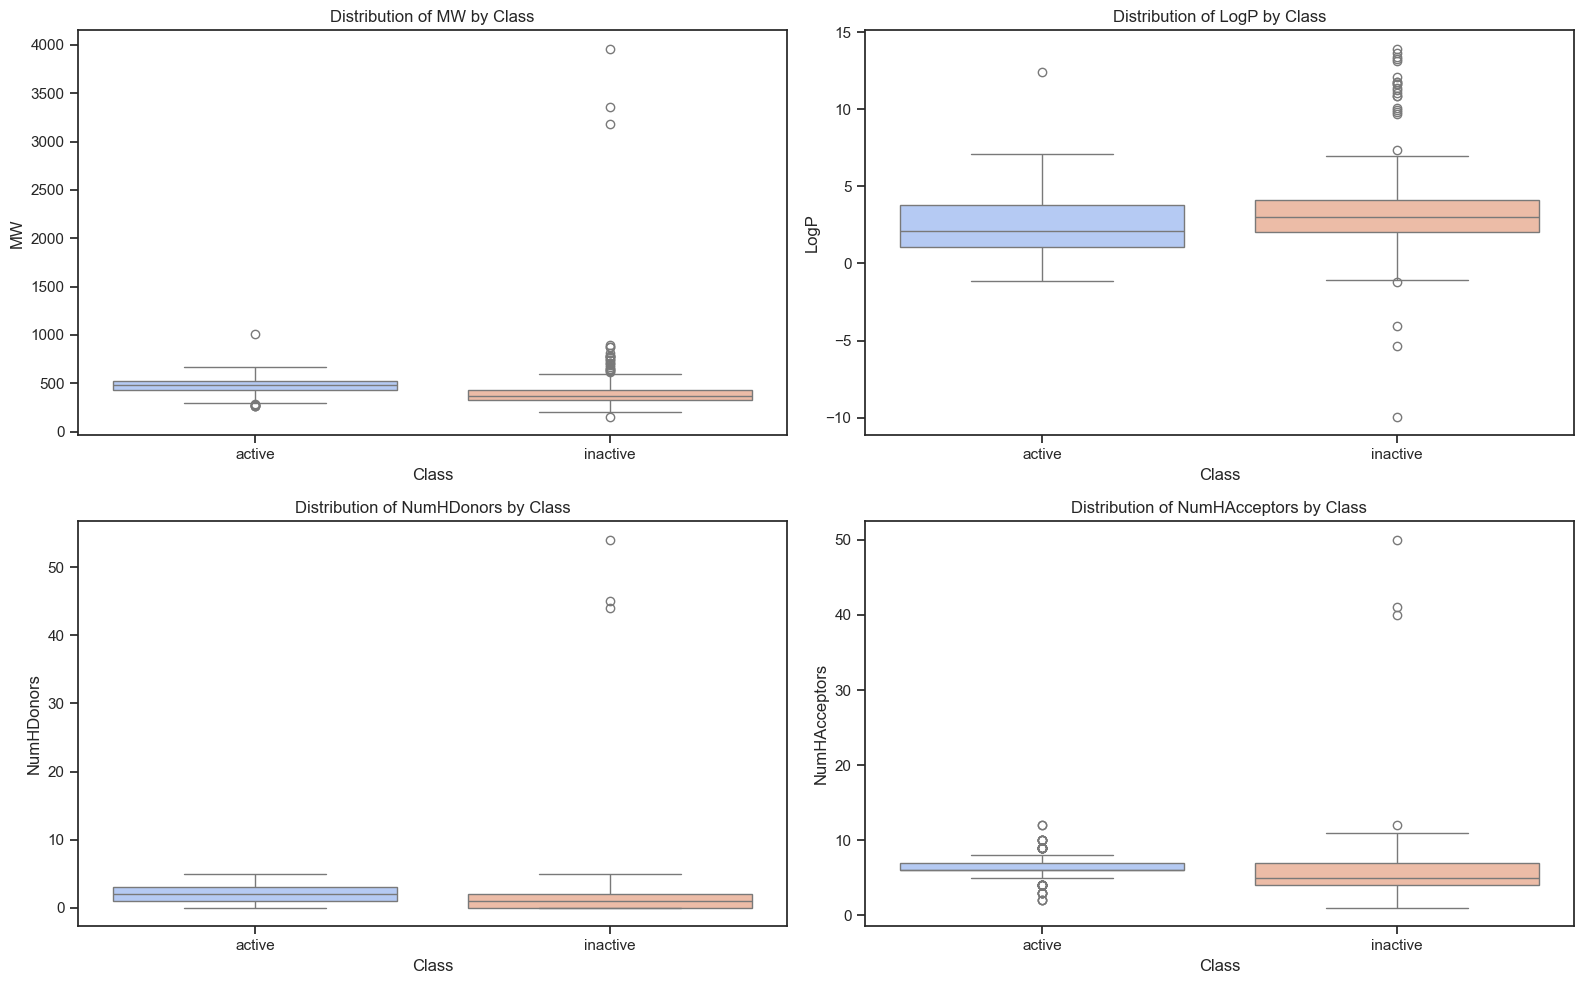

In [56]:
# ******* 1. Boxplot
# Define a list of the features you want to plot
features = ['MW', 'LogP', 'NumHDonors', 'NumHAcceptors']

# Create boxplots for each feature
plt.figure(figsize=(16, 10))

for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='class', y=feature, data=df_2class, hue='class', palette='coolwarm', legend=False)
    plt.title(f'Distribution of {feature} by Class')
    plt.xlabel('Class')
    plt.ylabel(feature)

plt.tight_layout()

# Save the figure to the specified location
output_path = os.path.join(output_dir, 'box_plots_TNF-alpha.png')
plt.savefig(output_path, dpi=300)  # Save with high resolution (300 dpi)
plt.show()

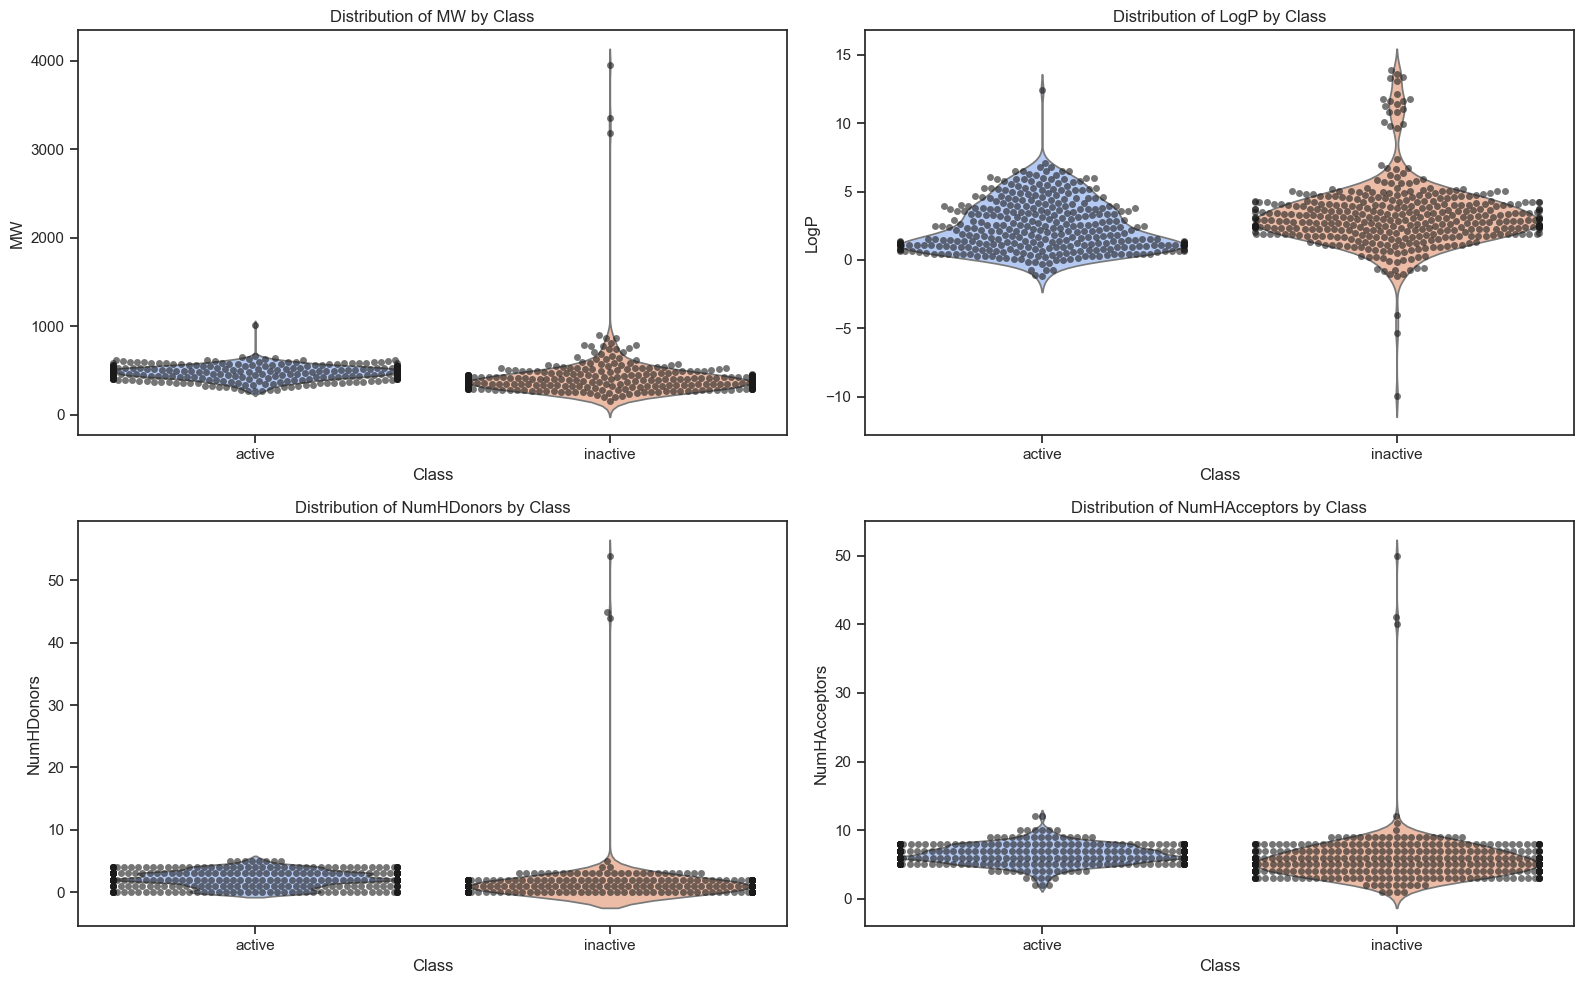

In [64]:
# ********** 2. Violin Plots with Jittered Data Points
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)

# Create violin plots with jittered data points
plt.figure(figsize=(16, 10))

for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.violinplot(x='class', y=feature, data=df_2class, hue='class', palette='coolwarm', inner=None)
    sns.swarmplot(x='class', y=feature, data=df_2class, color='k', alpha=0.6)
    plt.title(f'Distribution of {feature} by Class')
    plt.xlabel('Class')
    plt.ylabel(feature)
    plt.legend([],[], frameon=False)  # Remove the legend from each subplot

plt.tight_layout()

# Save the figure to the specified location
output_path = os.path.join(output_dir, 'violin_plots_TNF-alpha.png')
plt.savefig(output_path, dpi=300)  # Save with high resolution (300 dpi)
plt.show()

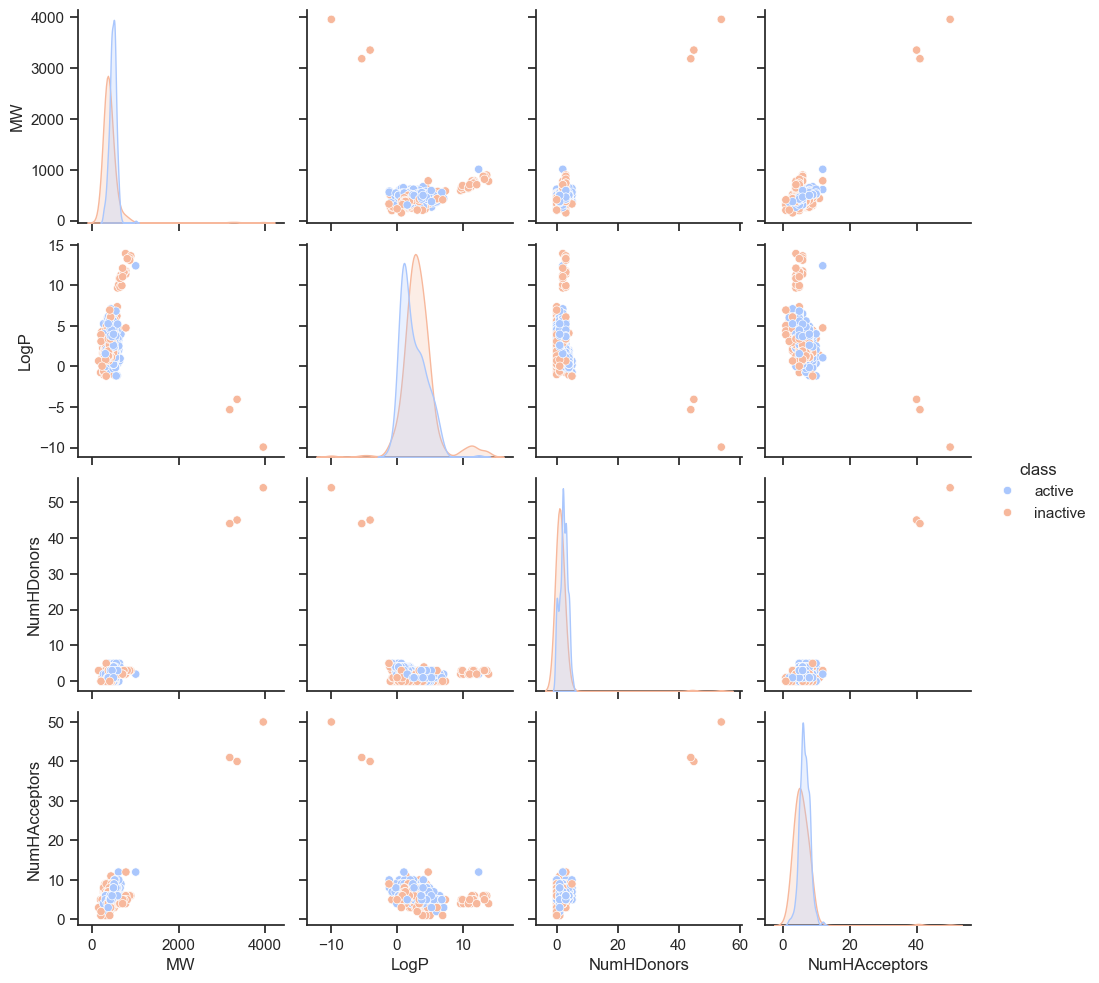

In [61]:
# ****** 3. Pairplot with KDE Diagonal

import seaborn as sns

# Pairplot with KDE on the diagonal
sns.pairplot(df_2class, hue='class', palette='coolwarm', diag_kind='kde', 
             vars=['MW', 'LogP', 'NumHDonors', 'NumHAcceptors'])

# Save the figure to the specified location
output_path = os.path.join(output_dir, 'pair_plots_TNF-alpha.png')
plt.savefig(output_path, dpi=300)  # Save with high resolution (300 dpi)
plt.show()

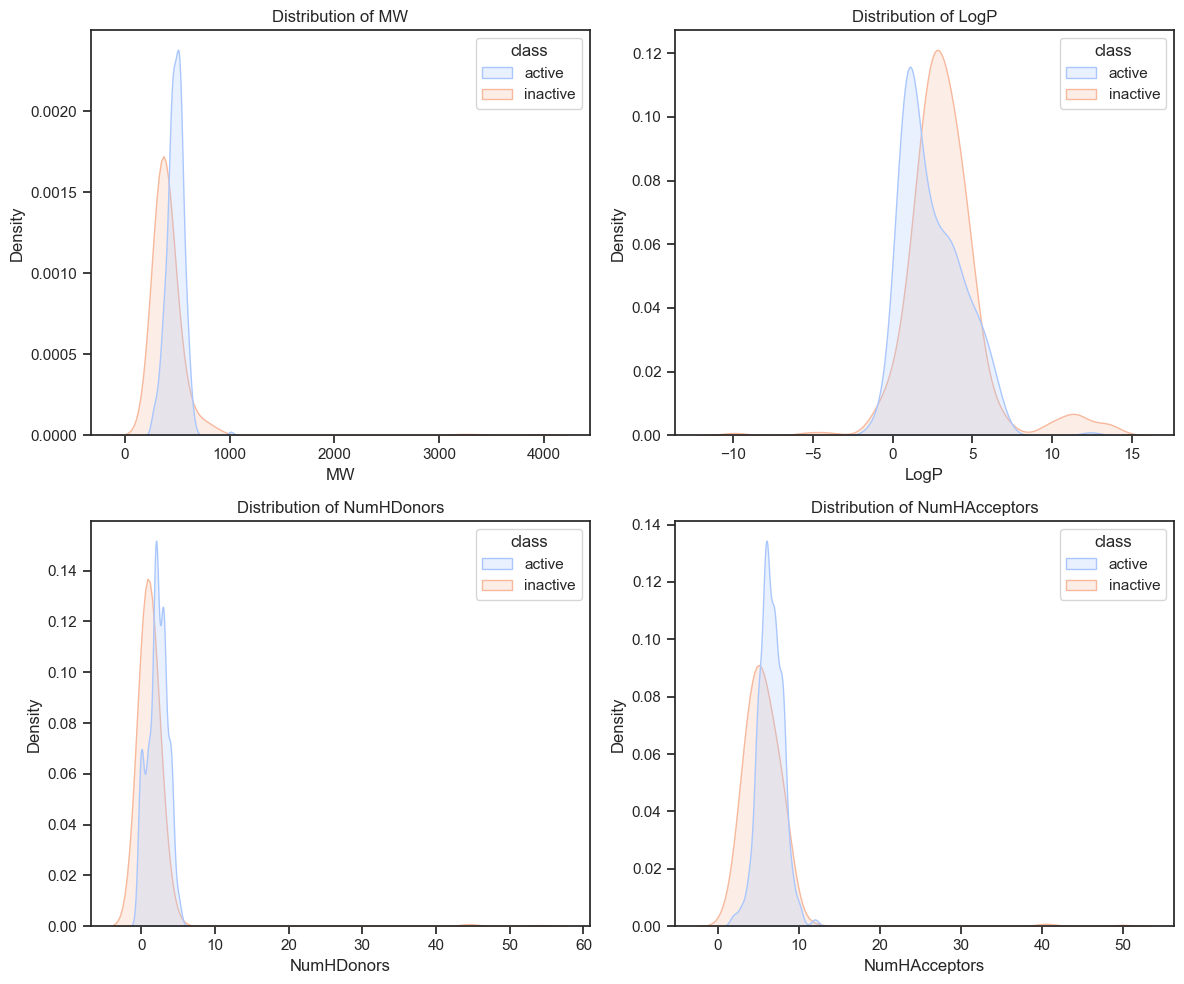

In [50]:
# ***** 4. FacetGrid with KDE Plots
import seaborn as sns
import matplotlib.pyplot as plt

# Features to plot
features = ['MW', 'LogP', 'NumHDonors', 'NumHAcceptors']
# Create a 2x2 panel
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Flatten the axes array for easy iteration
axes = axes.flatten()
for i, feature in enumerate(features):
    g = sns.kdeplot(data=df_2class, x=feature, hue='class', palette='coolwarm', fill=True, ax=axes[i])
    g.set_title(f'Distribution of {feature}')
    g.set_xlabel(feature)
    g.set_ylabel('Density')

# Adjust layout to avoid overlapping
plt.tight_layout()

# Save the figure to the specified location
output_path = os.path.join(output_dir, 'kde_plots_TNF-alpha.png')
plt.savefig(output_path, dpi=300)  # Save with high resolution (300 dpi)
plt.show()

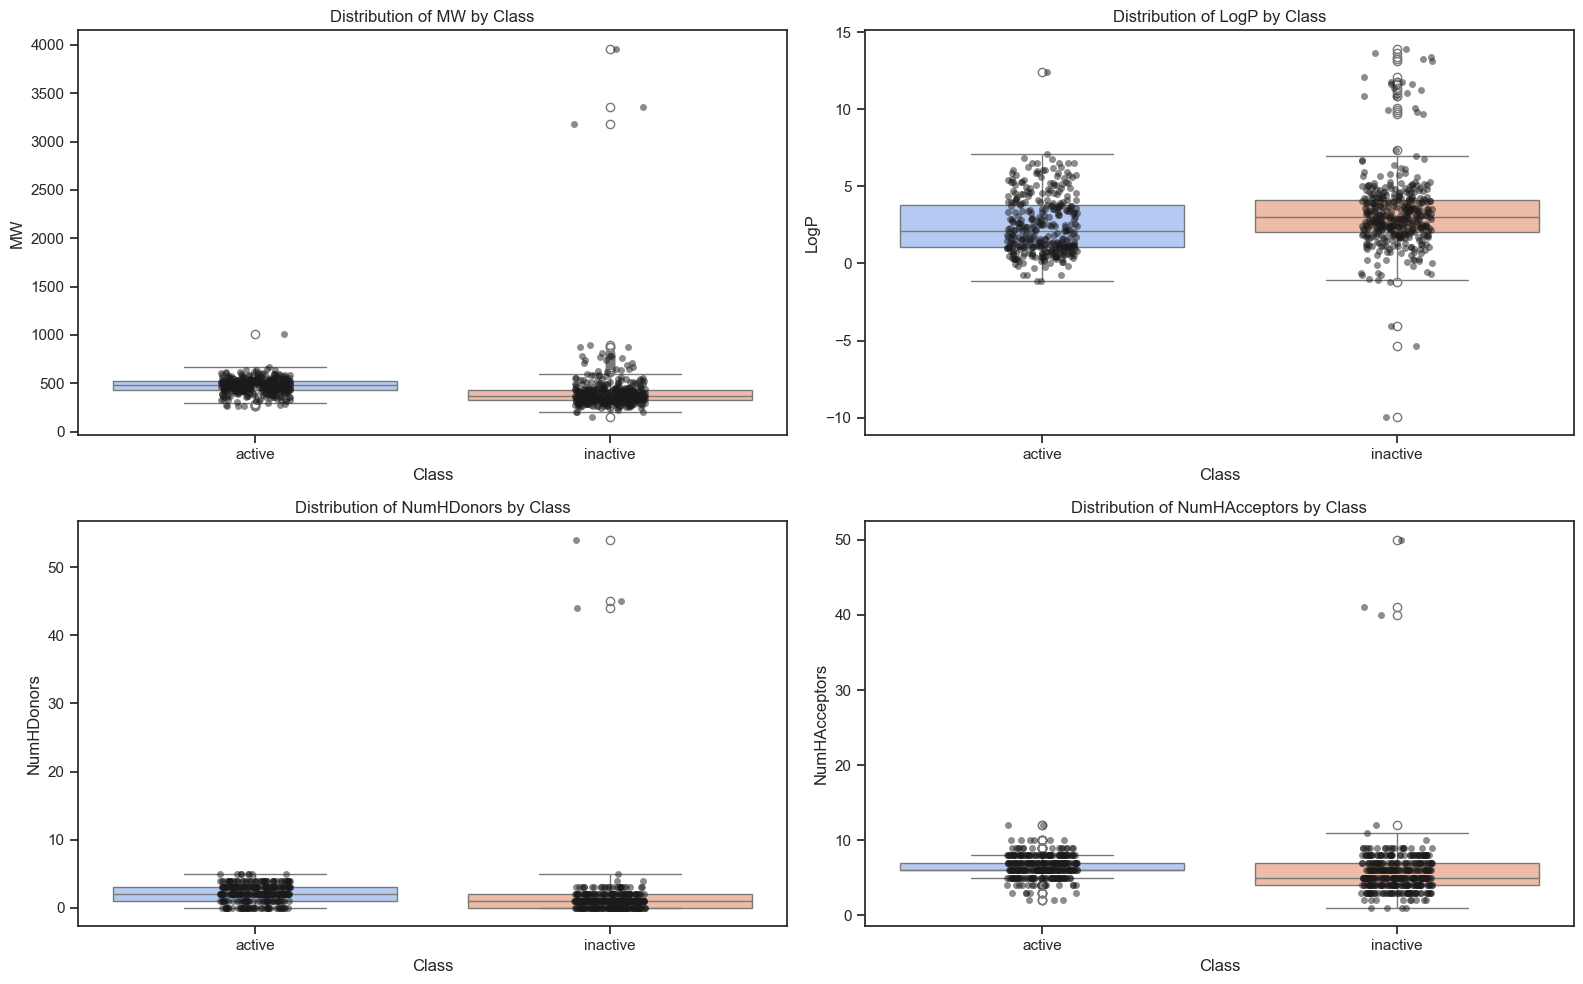

In [38]:
# ***** 5. Combined Boxplot and Stripplot
import seaborn as sns
import matplotlib.pyplot as plt

# Define a list of the features you want to plot
features = ['MW', 'LogP', 'NumHDonors', 'NumHAcceptors']

# Create combined boxplots and stripplots for each feature
plt.figure(figsize=(16, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)   
    
    # Boxplot with 'class' as hue
    sns.boxplot(x='class', y=feature, data=df_2class, hue='class', palette='coolwarm')     
    # Stripplot without 'hue'
    sns.stripplot(x='class', y=feature, data=df_2class, color='k', alpha=0.5, dodge=False)    
    plt.title(f'Distribution of {feature} by Class')
    plt.xlabel('Class')
    plt.ylabel(feature)

    # Remove redundant legend
    plt.legend([],[], frameon=False)

plt.tight_layout()

# Save the figure to the specified location
output_path = os.path.join(output_dir, 'boxstri_plots_TNF-alpha.png')
plt.savefig(output_path, dpi=300)  # Save with high resolution (300 dpi)
plt.show()

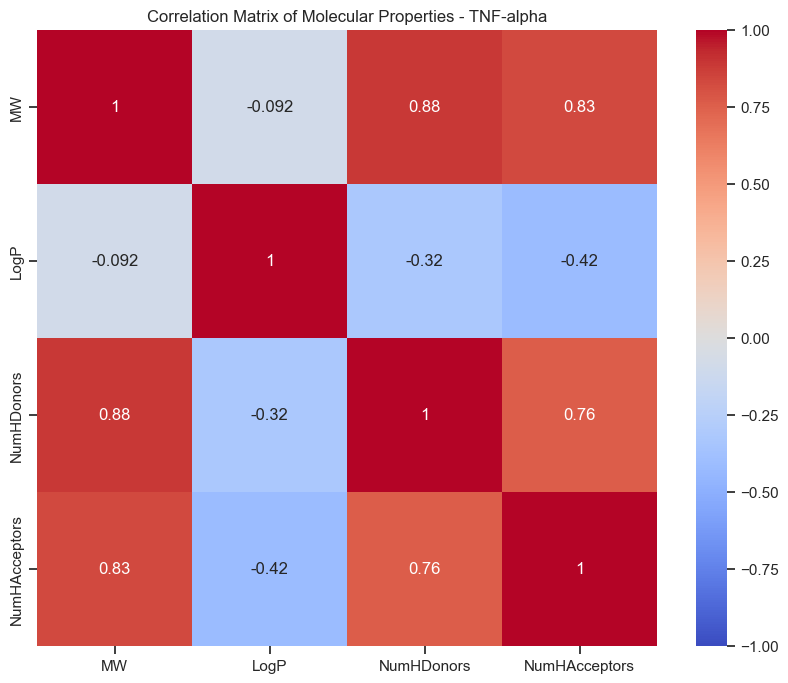

In [52]:
# ***** 6. Heatmap of Correlation Matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr = df_2class[['MW', 'LogP', 'NumHDonors', 'NumHAcceptors']].corr()

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Matrix of Molecular Properties - TNF-alpha')

# Save the figure to the specified location
output_path = os.path.join(output_dir, 'heatmap_TNF-alpha.png')
plt.savefig(output_path, dpi=300)  # Save with high resolution (300 dpi)
plt.show()

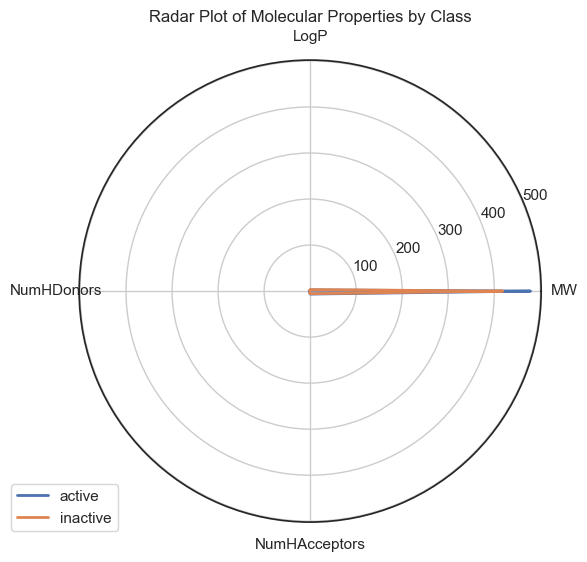

In [35]:
# ***** 7. Radar Plot (Spider Plot)

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming data has been normalized for better comparison
features = ['MW', 'LogP', 'NumHDonors', 'NumHAcceptors']

# Group by class and calculate the mean of features
df_mean = df_2class.groupby('class')[features].mean()

# Prepare data for radar plot
categories = list(df_mean.columns)
N = len(categories)

# What will be the angle of each axis in the plot?
angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]

# Initialise the spider plot
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Plot data for each class
for idx in df_mean.index:
    values = df_mean.loc[idx].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=2, linestyle='solid', label=idx)
    ax.fill(angles, values, alpha=0.25)

# Add labels
plt.xticks(angles[:-1], categories)
plt.title('Radar Plot of Molecular Properties by Class')
ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

plt.show()

In [53]:
# Statistical Analysis
# Install scipy
#  python -m pip install scipy

#Statistical analysis | Mann-Whitney U Test
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'class']
  df = df_2class[selection]
  active = df[df['class'] == 'active']
  active = active[descriptor]

  selection = [descriptor, 'class']
  df = df_2class[selection]
  inactive = df[df['class'] == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'
  
  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [59]:
print (mannwhitney('MW'))
print (mannwhitney('LogP'))
print (mannwhitney('NumHDonors'))
print (mannwhitney('NumHAcceptors'))

  Descriptor  Statistics             p  alpha  \
0         MW    107383.5  1.818424e-39   0.05   

                       Interpretation  
0  Different distribution (reject H0)  
  Descriptor  Statistics             p  alpha  \
0       LogP     52429.5  1.708140e-08   0.05   

                       Interpretation  
0  Different distribution (reject H0)  
   Descriptor  Statistics             p  alpha  \
0  NumHDonors    102472.5  3.545185e-32   0.05   

                       Interpretation  
0  Different distribution (reject H0)  
      Descriptor  Statistics             p  alpha  \
0  NumHAcceptors     90794.5  3.392765e-14   0.05   

                       Interpretation  
0  Different distribution (reject H0)  


In [65]:
# Before converting to pIC50 --> Check if any of IC50 value is > 100 million? Check the distribution.
df_2class.standard_value.describe()

count    7.440000e+02
mean     8.928495e+04
std      9.860548e+05
min      0.000000e+00
25%      2.457250e+02
50%      1.100000e+04
75%      2.000000e+04
max      2.060000e+07
Name: standard_value, dtype: float64

In [66]:
-np.log10( (10**-9)* 100000000 )

np.float64(1.0)

In [67]:
-np.log10( (10**-9)* 10000000000 ) # If value is greater than 100 million then -logp tansformation will come -Ve

np.float64(-1.0)

In [75]:
import pandas as pd

def norm_value(input_df):
    # Clip values greater than 100000000 to 100000000
    input_df.loc[:, 'standard_value_norm'] = input_df['standard_value'].clip(upper=100000000)
    
    # Drop the original 'standard_value' column
    x = input_df.drop(columns='standard_value')
    
    return x

In [76]:
#We will first apply the norm_value() function to normalize the values in the standard_value column.
df_2class_norm = norm_value(df_2class)
df_2class_norm

,molecule_chembl_id,canonical_smiles,class,target_name,disease_name,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL306090,CNC(=O)[C@@H](NC(=O)[C@H](c1ccc(C)cc1)[C@H](CO...,active,TNF-alpha,IBD,379.457,0.46942,5.0,5.0,269.0
3,CHEMBL72511,CNC(=O)[C@@H](NC(=O)[C@H](c1ccc(OC)cc1)[C@H](C...,active,TNF-alpha,IBD,395.456,0.16960,5.0,6.0,48.0
4,CHEMBL76297,CNC(=O)[C@@H](NC(=O)[C@H](c1ccccc1)[C@H](CO)C(...,active,TNF-alpha,IBD,365.430,0.16100,5.0,5.0,928.0
5,CHEMBL11440,O=C1CCC(N2C(=O)c3c(F)c(F)c(F)c(F)c3C2=O)C(=O)N1,active,TNF-alpha,IBD,330.193,0.64420,1.0,4.0,400.0
6,CHEMBL63,COc1ccc(C2CNC(=O)C2)cc1OC1CCCC1,inactive,TNF-alpha,IBD,275.348,2.62010,1.0,3.0,12000.0
...,...,...,...,...,...,...,...,...,...,...
952,CHEMBL2152944,O=C1c2ccc(Nc3ccc(F)cc3F)cc2CCc2ccc(OC[C@H](O)C...,active,TNF-alpha,IBD,425.431,3.77000,3.0,5.0,0.0
953,CHEMBL4648362,Cc1cc2c(-c3ccco3)cnc(N[C@@H]3CCN(C)C[C@H]3C(=O...,active,TNF-alpha,IBD,463.582,3.67262,3.0,6.0,870.0
955,CHEMBL5268975,COc1cc(/C=C2\CC/C(=C\c3ccccc3C(F)(F)F)C2=O)ccc1O,active,TNF-alpha,IBD,374.358,5.24950,1.0,3.0,629.0
959,CHEMBL5282465,CCOC(=O)C1=C(C)NC2S/C(=C\c3ccc(N4CCOCC4)cc3)C(...,active,TNF-alpha,IBD,497.642,3.96620,1.0,8.0,890.0


In [79]:
df_2class_norm.standard_value_norm.describe() # No change because none of the value was higher than >100 million

count    7.440000e+02
mean     8.928495e+04
std      9.860548e+05
min      0.000000e+00
25%      2.457250e+02
50%      1.100000e+04
75%      2.000000e+04
max      2.060000e+07
Name: standard_value_norm, dtype: float64

In [86]:
#Convert IC50 to pIC50
#This custom function pIC50() will accept a DataFrame as input and will:
#Take the IC50 values from the standard_value column and converts it from nM to M by multiplying the value by 10
#Take the molar value and apply -log10
#Delete the standard_value column and create a new pIC50 column

# https://github.com/chaninlab/estrogen-receptor-alpha-qsar/blob/master/02_ER_alpha_RO5.ipynb

import numpy as np

def pIC50(input_df):
    # Convert values to Molar and calculate pIC50
    # Handle zero values by replacing them with a very small number (1e-9)
    input_df['pIC50'] = -np.log10(input_df['standard_value_norm'].replace(0, 1e-9) * 1e-9)
    
    # Drop the 'standard_value_norm' column
    #x = input_df.drop(columns='standard_value_norm')
    x = input_df
    return x

In [87]:
df_2class_norm_pIC50 = pIC50(df_2class_norm)
df_2class_norm_pIC50

,molecule_chembl_id,canonical_smiles,class,target_name,disease_name,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm,pIC50
0,CHEMBL306090,CNC(=O)[C@@H](NC(=O)[C@H](c1ccc(C)cc1)[C@H](CO...,active,TNF-alpha,IBD,379.457,0.46942,5.0,5.0,269.0,6.570248
3,CHEMBL72511,CNC(=O)[C@@H](NC(=O)[C@H](c1ccc(OC)cc1)[C@H](C...,active,TNF-alpha,IBD,395.456,0.16960,5.0,6.0,48.0,7.318759
4,CHEMBL76297,CNC(=O)[C@@H](NC(=O)[C@H](c1ccccc1)[C@H](CO)C(...,active,TNF-alpha,IBD,365.430,0.16100,5.0,5.0,928.0,6.032452
5,CHEMBL11440,O=C1CCC(N2C(=O)c3c(F)c(F)c(F)c(F)c3C2=O)C(=O)N1,active,TNF-alpha,IBD,330.193,0.64420,1.0,4.0,400.0,6.397940
6,CHEMBL63,COc1ccc(C2CNC(=O)C2)cc1OC1CCCC1,inactive,TNF-alpha,IBD,275.348,2.62010,1.0,3.0,12000.0,4.920819
...,...,...,...,...,...,...,...,...,...,...,...
952,CHEMBL2152944,O=C1c2ccc(Nc3ccc(F)cc3F)cc2CCc2ccc(OC[C@H](O)C...,active,TNF-alpha,IBD,425.431,3.77000,3.0,5.0,0.0,18.000000
953,CHEMBL4648362,Cc1cc2c(-c3ccco3)cnc(N[C@@H]3CCN(C)C[C@H]3C(=O...,active,TNF-alpha,IBD,463.582,3.67262,3.0,6.0,870.0,6.060481
955,CHEMBL5268975,COc1cc(/C=C2\CC/C(=C\c3ccccc3C(F)(F)F)C2=O)ccc1O,active,TNF-alpha,IBD,374.358,5.24950,1.0,3.0,629.0,6.201349
959,CHEMBL5282465,CCOC(=O)C1=C(C)NC2S/C(=C\c3ccc(N4CCOCC4)cc3)C(...,active,TNF-alpha,IBD,497.642,3.96620,1.0,8.0,890.0,6.050610


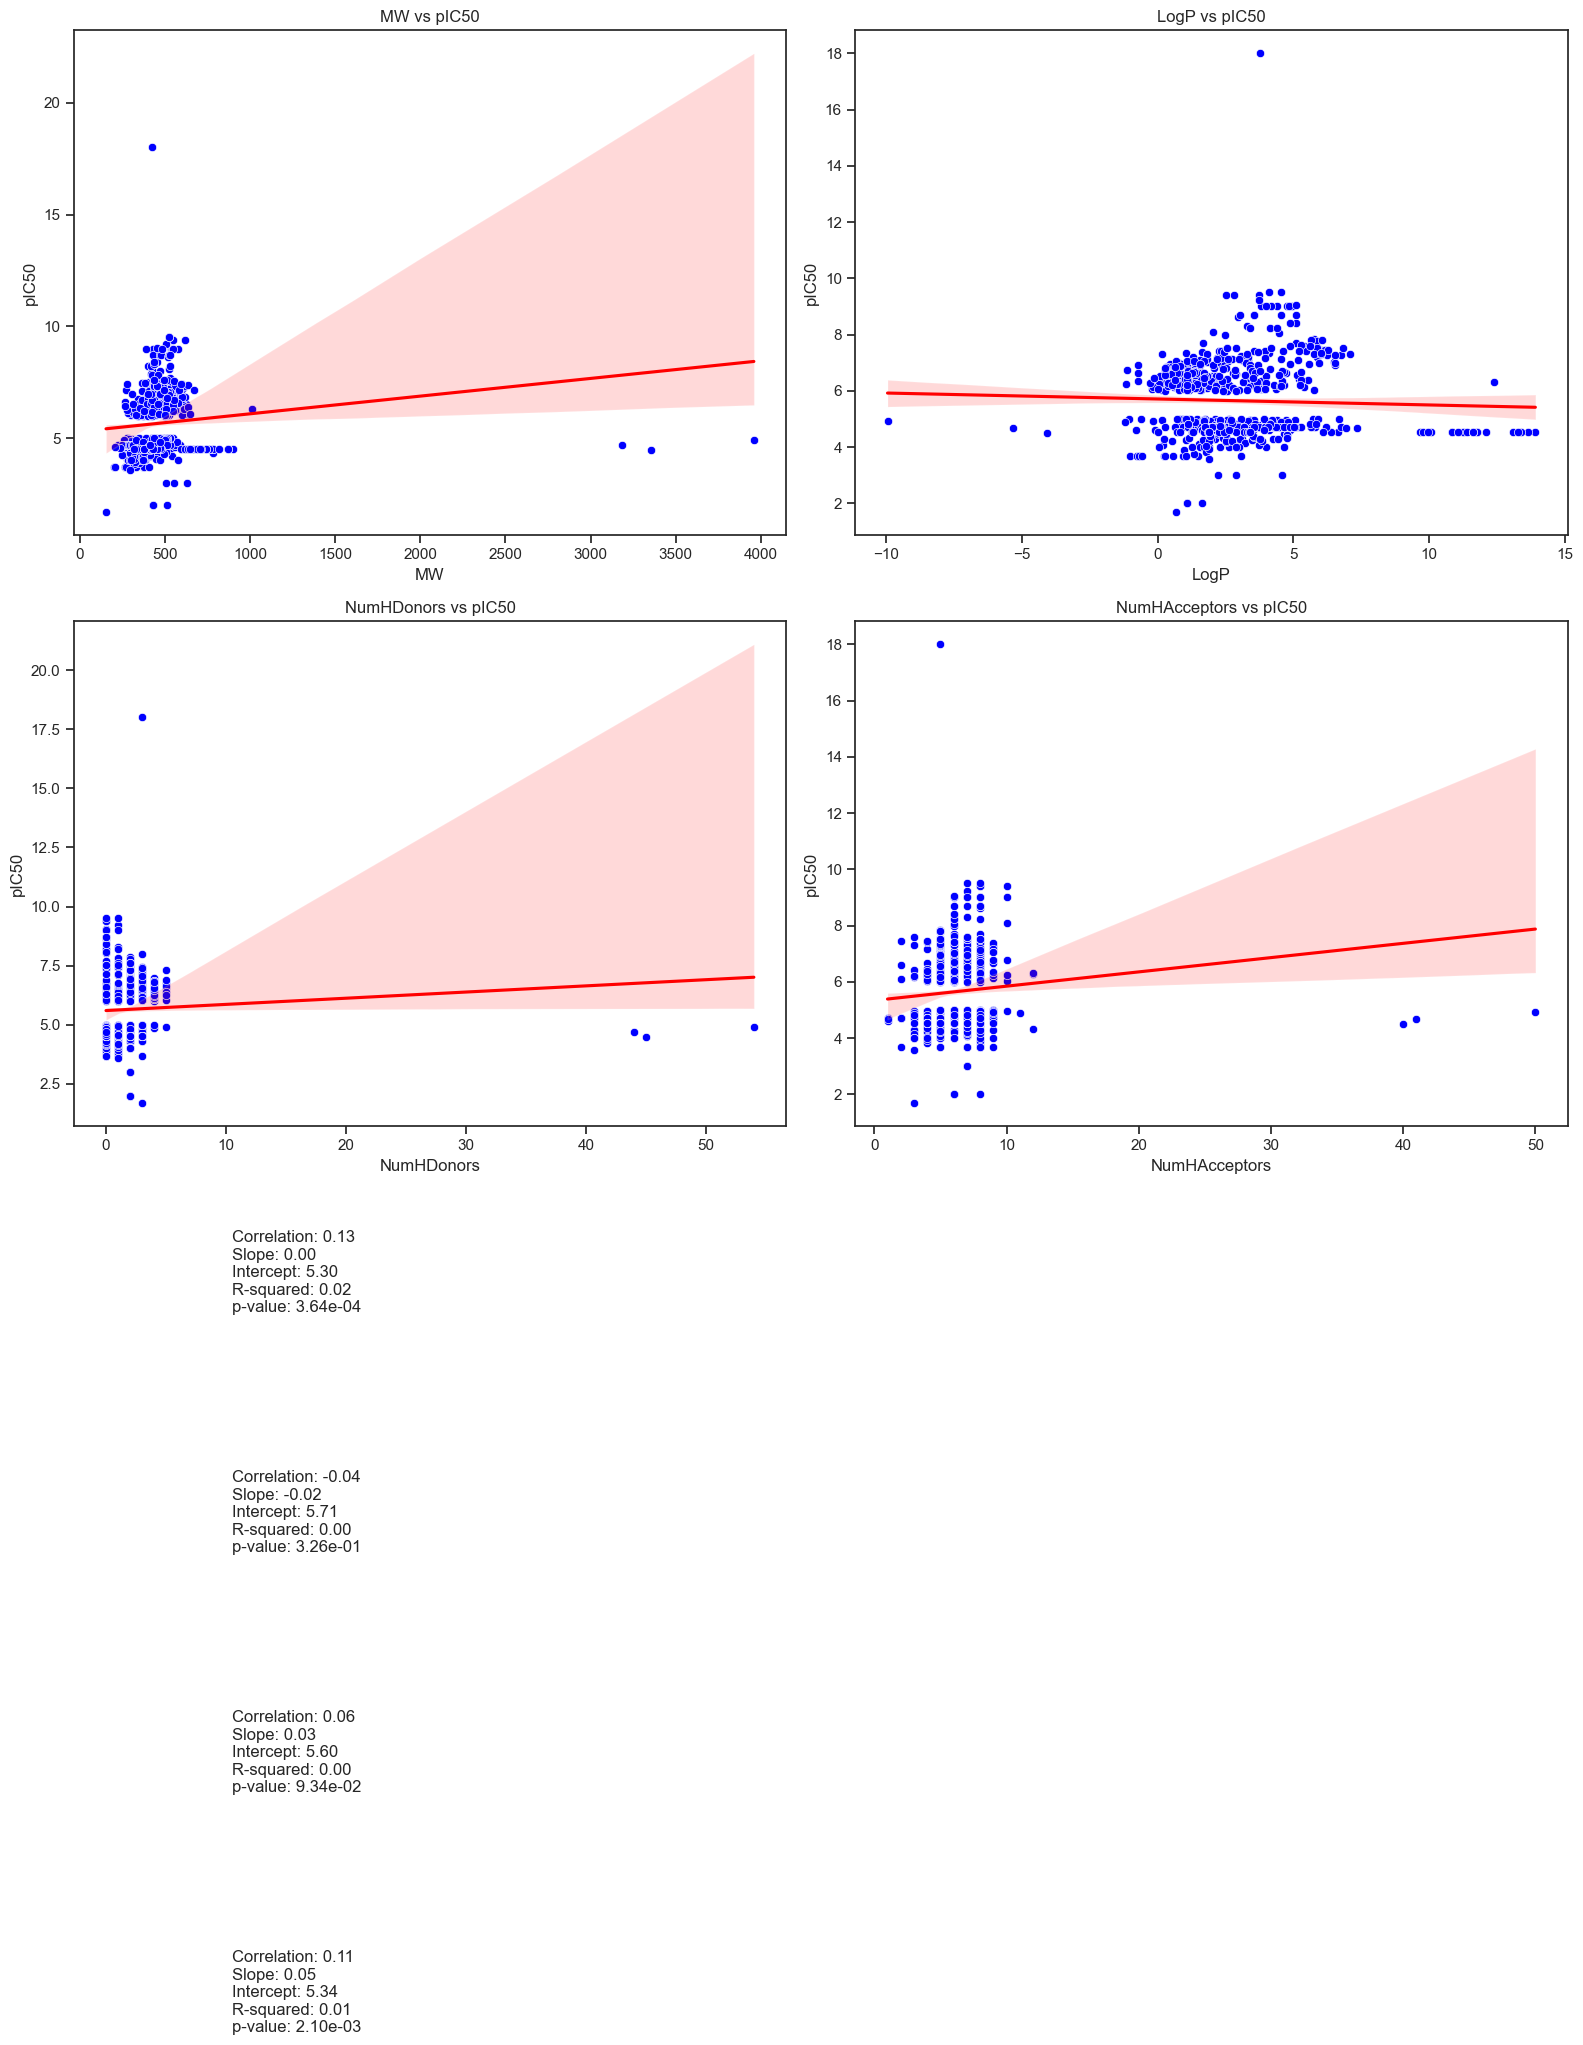

In [93]:
# Quick way to Check the Association between pIC50 and Molecular Properties
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, linregress

features = ['MW', 'LogP', 'NumHDonors', 'NumHAcceptors']

# Set up the matplotlib figure
plt.figure(figsize=(16, 12))

for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(x=feature, y='pIC50', data=df_2class_norm_pIC50, color='blue')
    sns.regplot(x=feature, y='pIC50', data=df_2class_norm_pIC50, scatter=False, color='red')
    plt.title(f'{feature} vs pIC50')
    plt.xlabel(feature)
    plt.ylabel('pIC50')
    
    # Calculate and print correlation and regression statistics
    corr, _ = pearsonr(df_2class_norm_pIC50[feature], df_2class_norm_pIC50['pIC50'])
    slope, intercept, r_value, p_value, std_err = linregress(df_2class_norm_pIC50[feature], df_2class_norm_pIC50['pIC50'])
    
    plt.figtext(0.15, 0.1 - (i*0.2), 
                f'Correlation: {corr:.2f}\n'
                f'Slope: {slope:.2f}\n'
                f'Intercept: {intercept:.2f}\n'
                f'R-squared: {r_value**2:.2f}\n'
                f'p-value: {p_value:.2e}', 
                fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

plt.tight_layout()

# Save the figure to the specified location
output_path = os.path.join(output_dir, 'pIC50_vs_MolecularProperties_TNF-alpha.png')
plt.savefig(output_path, dpi=300)  # Save with high resolution (300 dpi)
plt.show()

In [94]:
print(df_2class_norm_pIC50.shape)
# Save converted pIC50 values along with the Molecular Properties for TNF-alpha
df_2class_norm_pIC50.to_csv('/Users/ashoksharma/Work/Python_bioinfo/Disease_target/output/Set1_MolecularProperties_pIC50.csv', index=False)

(744, 11)
